Unlike other machine learning algorithms, convolutional neural networks are capable of automatically learning features from sequence data, support multiple-variate data, and can directly output a vector for multi-step forecasting. In this tutorial, you will discover how to develop 1D convolutional neural networks for multi-step time series forecasting. After completing this tutorial, you will know:
- How to develop a CNN for multi-step time series forecasting model for univariate data.
- How to develop a multi-channel multi-step time series forecasting model for multivariate data.
- How to develop a multi-headed multi-step time series forecasting model for multivariate data.


## 19.1 Tutorial Overview
This tutorial is divided into seven parts; they are: 
1. Problem Description
2. Load and Prepare Dataset
3. Model Evaluation
4. CNNs for Multi-step Forecasting 
5. Univariate CNN Model
6. Multi-channel CNN Model
7. Multi-headed CNN Model


## 19.2 Problem Description

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

- global active power: The total active power consumed by the household (kilowatts).
- global reactive power: The total reactive power consumed by the household (kilowatts). 􏰀 voltage: Average voltage (volts).
- global intensity: Average current intensity (amps).
- sub metering 1: Active energy for kitchen (watt-hours of active energy).
- sub metering 2: Active energy for laundry (watt-hours of active energy).
- sub metering 3: Active energy for climate control systems (watt-hours of active energy).

Active and reactive energy refer to the technical details of alternative current. A fourth sub-metering variable can be created by subtracting the sum of three defined sub-metering variables from the total active energy.

## 19.3 Load and Prepare Dataset

## 19.4 Model Evaluation

### 19.4.1 Walk-Forward Validation
Models will be evaluated using a scheme called walk-forward validation. This is where a model is required to make a one week prediction, then the actual data for that week is made available to the model so that it can be used as the basis for making a prediction on the subsequent week.

Input,　　　　　　　　　　　　Predict<br>
[Week1] 　　　　　　　　　　　Week2<br>
[Week1 + Week2] 　　　　　　 Week3<br>
[Week1 + Week2 + Week3] 　 Week4<br>
．．．．．

## 19.5 CNNs for Multi-step Forecasting

CNNs can be used in either a recursive or direct forecast strategy, where the model makes one-step predictions and outputs are fed as inputs for subsequent predictions, and where one model is developed for each time step to be predicted. Alternately, CNNs can be used to predict the entire output sequence as a one-step prediction of the entire vector. This is a general benefit of feedforward neural networks. An important secondary benefit of using CNNs is that they can support multiple 1D inputs in order to make a prediction. 

This can be achieved using two different model configurations.
- Multiple Input Channels. This is where each input sequence is read as a separate channel, __like the different channels of an image__ (e.g. red, green and blue).
- Multiple Input Heads. This is where each input sequence is read by a different __CNN submodel__ and the internal representations are combined before being interpreted and used to make a prediction.


In this tutorial, we will explore how to develop three different types of CNN models for multi-step time series forecasting; they are:
- A CNN for multi-step time series forecasting with univariate input data.
- A CNN for multi-step time series forecasting with multivariate input data via channels. 􏰀 
- A CNN for multi-step time series forecasting with multivariate input data via submodels.


## 19.6 Univariate CNN Model


Specifically, the framing of the problem is: *Given some number of prior days of total daily power consumption, predict the next standard week of daily power consumption*. 

Some ideas on the size and nature of this input include:
- All prior days, up to years worth of data. 􏰀 The prior seven days.
- The prior two weeks.
- The prior one month.
- The prior one year.
- The prior week and the week to be predicted from one year ago.

A good starting point would be to use the prior seven days. A 1D CNN model expects data to have the shape of: [samples, timesteps, features]. One sample will be comprised of seven time steps with one feature for the seven days of total daily power consumed. The training dataset has 159 weeks of data, so the shape of the training dataset would be: [159, 7, 1].

A problem is that 159 instances is not a lot for a neural network. A way to create a lot more training data is to change the problem during training to __predict the next seven days given the prior seven days__, regardless of the standard week. This only impacts the training data, the test problem remains the same: __predict the daily power consumption for the next standard week given the prior standard week.__ 

The training data is provided in standard weeks with eight variables, specifically in the shape [159, 7, 8]. The first step is to flatten the data so that we have eight time series sequences.

We need to iterate over the time steps and divide the data into overlapping windows; each iteration moves along one time step and predicts the subsequent seven days. For example:

Input, 　　　　　　　　　　　　　　　Output<br>
[d01, d02, d03, d04, d05, d06, d07], [d08, d09, d10, d11, d12, d13, d14] <br>
[d02, d03, d04, d05, d06, d07, d08], [d09, d10, d11, d12, d13, d14, d15]<br>

When we run this function on the entire training dataset, we transform 159 samples into 1,099; specifically, the transformed dataset has the shapes X=[1099, 7, 1] and y=[1099, 7].

This multi-step time series forecasting problem is an autoregression. That means it is likely best modeled where that the next seven days is some function of observations at prior time steps. This and the relatively small amount of data means that a small model is required. We will use a model with one convolution layer with 16 filters and a kernel size of 3. This means that the input sequence of seven days will be read with a convolutional operation three time steps at a time and this operation will be performed 16 times. A pooling layer will reduce these feature maps by 1 their 4 size before the internal representation is flattened to one long vector. This is then interpreted by a fully connected layer before the output layer predicts the next seven days in the sequence.

W0627 15:35:39.356978 4383696320 deprecation_wrapper.py:119] From /Users/Jianhua/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 15:35:39.376922 4383696320 deprecation_wrapper.py:119] From /Users/Jianhua/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 15:35:39.382049 4383696320 deprecation_wrapper.py:119] From /Users/Jianhua/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 15:35:39.428534 4383696320 deprecation_wrapper.py:119] From /Users/Jianhua/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0627 15:35:39.4874

cnn: [413.980] 440.1, 403.0, 342.9, 415.3, 427.3, 329.0, 512.5


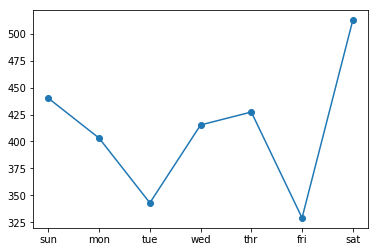

In [3]:
# univariate multi-step cnn for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 4
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(10, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 7
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('cnn', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='cnn')
pyplot.show()

Running the example fits and evaluates the model, printing the overall RMSE across all seven days, and the per-day RMSE for each lead time. We can see that in this case, the model was skillful as compared to a naive forecast, achieving an overall RMSE of about 414 kilowatts, less than 465 kilowatts achieved by a naive model.

A plot of the daily RMSE is also created. The plot shows that perhaps Tuesdays and Fridays are easier days to forecast than the other days and that perhaps Saturday at the end of the standard week is the hardest day to forecast.

We can increase the number of prior days to use as input from seven to 14 by changing the n input variable. Re-running the example with this change first prints a summary of the performance of the model. In this case, we can see a further drop in the overall RMSE, suggesting that further tuning of the input size and perhaps the kernel size of the model may result in better performance.

Comparing the per-day RMSE scores, we see some are better and some are worse than using seventh inputs. This may suggest a benefit in using the __two different sized inputs in some way, such as an ensemble of the two approaches or perhaps a single model__ (e.g. a multi-headed model) that reads the training data in different ways.

## 19.7 Multi-channel CNN Model


In this section, we will update the CNN developed in the previous section to use each of the eight time series variables to predict the next standard week of daily total power consumption. Each one-dimensional time series to the model as a separate channel of input, use a separate kernel and read each input sequence onto a separate set of filter maps, essentially learning features from each input time series variable.

We will use 14 days of prior observations across eight of the input variables as we did in the final section of the prior section that resulted in slightly better performance.

With a little trial and error, one model that performs well uses two convolutional layers with 32 filter maps followed by pooling, then another convolutional layer with 16 feature maps and pooling. The fully connected layer that interprets the features is increased to 100 nodes and the model is fit for 70 epochs with a batch size of 16 samples.

cnn: [377.851] 398.8, 382.3, 344.3, 374.4, 345.4, 323.2, 460.1


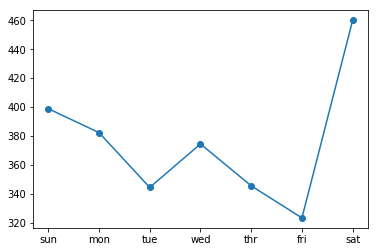

In [4]:
# multichannel multi-step cnn for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('cnn', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='cnn')
pyplot.show()

Running the example fits and evaluates the model, printing the overall RMSE across all seven days, and the per-day RMSE for each lead time. We can see that in this case, the use of all eight input variables does result in another small drop in the overall RMSE score.

For the daily RMSE scores, we do see that some are better and some are worse than the univariate CNN from the previous section. The final day, Saturday, remains a challenging day to forecast, and Friday an easy day to forecast. There may be some benefit in designing models to focus specifically on reducing the error of the harder to forecast days. It may be interesting to see if the variance across daily scores could be further reduced with a tuned model or perhaps an ensemble of multiple different models. It may also be interesting to compare the performance for a model that uses seven or even 21 days of input data to see if further gains can be made.

## 19.8 Multi-headed CNN Model


We can further extend the CNN model to have a separate sub-CNN model or head for each input variable, which we can refer to as a multi-headed CNN model. This requires a modification to the preparation of the model, and in turn, modification to the preparation of the training and test datasets. Starting with the model, we must define a separate CNN model for each of the eight input variables. The configuration of the model, including the number of layers and their hyperparameters, were also modified to better suit the new approach. 

We can loop over each variable and create a submodel that takes a one-dimensional sequence of 14 days of data and outputs a flat vector containing a summary of the learned features from the sequence. Each of these vectors can be merged via concatenation to make one very long vector that is then interpreted by some fully connected layers before a prediction is made. As we build up the submodels, we keep track of the input layers and flatten layers in lists. This is so that we can specify the inputs in the definition of the model object and use the list of flatten layers in the merge layer.

cnn: [418.111] 444.1, 437.3, 363.0, 384.3, 445.3, 374.5, 466.2


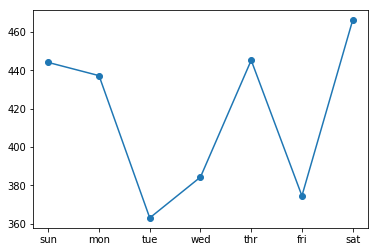

In [4]:
# multi headed multi-step cnn for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.utils import plot_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
%matplotlib inline

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# plot training history
def plot_history(history):
	# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.title('loss', y=0, loc='center')
	pyplot.legend()
	# plot rmse
	pyplot.subplot(2, 1, 2)
	pyplot.plot(history.history['rmse'], label='train')
	pyplot.plot(history.history['val_rmse'], label='test')
	pyplot.title('rmse', y=0, loc='center')
	pyplot.legend()
	pyplot.show()

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 25, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# create a channel for each variable
	in_layers, out_layers = list(), list()
	for _ in range(n_features):
		inputs = Input(shape=(n_timesteps,1))
		conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
		conv2 = Conv1D(filters=32, kernel_size=3, activation='relu')(conv1)
		pool1 = MaxPooling1D(pool_size=2)(conv2)
		flat = Flatten()(pool1)
		# store layers
		in_layers.append(inputs)
		out_layers.append(flat)
	# merge heads
	merged = concatenate(out_layers)
	# interpretation
	dense1 = Dense(200, activation='relu')(merged)
	dense2 = Dense(100, activation='relu')(dense1)
	outputs = Dense(n_outputs)(dense2)
	model = Model(inputs=in_layers, outputs=outputs)
	# compile model
	model.compile(loss='mse', optimizer='adam')
	# plot the model
	plot_model(model, show_shapes=True, to_file='multiheaded_cnn.png', show_layer_names=True)
	# fit network
	input_data = [train_x[:,:,i].reshape((train_x.shape[0],n_timesteps,1)) for i in range(n_features)]
	model.fit(input_data, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into n input arrays
	input_x = [input_x[:,i].reshape((1,input_x.shape[0],1)) for i in range(input_x.shape[1])]
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('cnn', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='cnn')
pyplot.show()

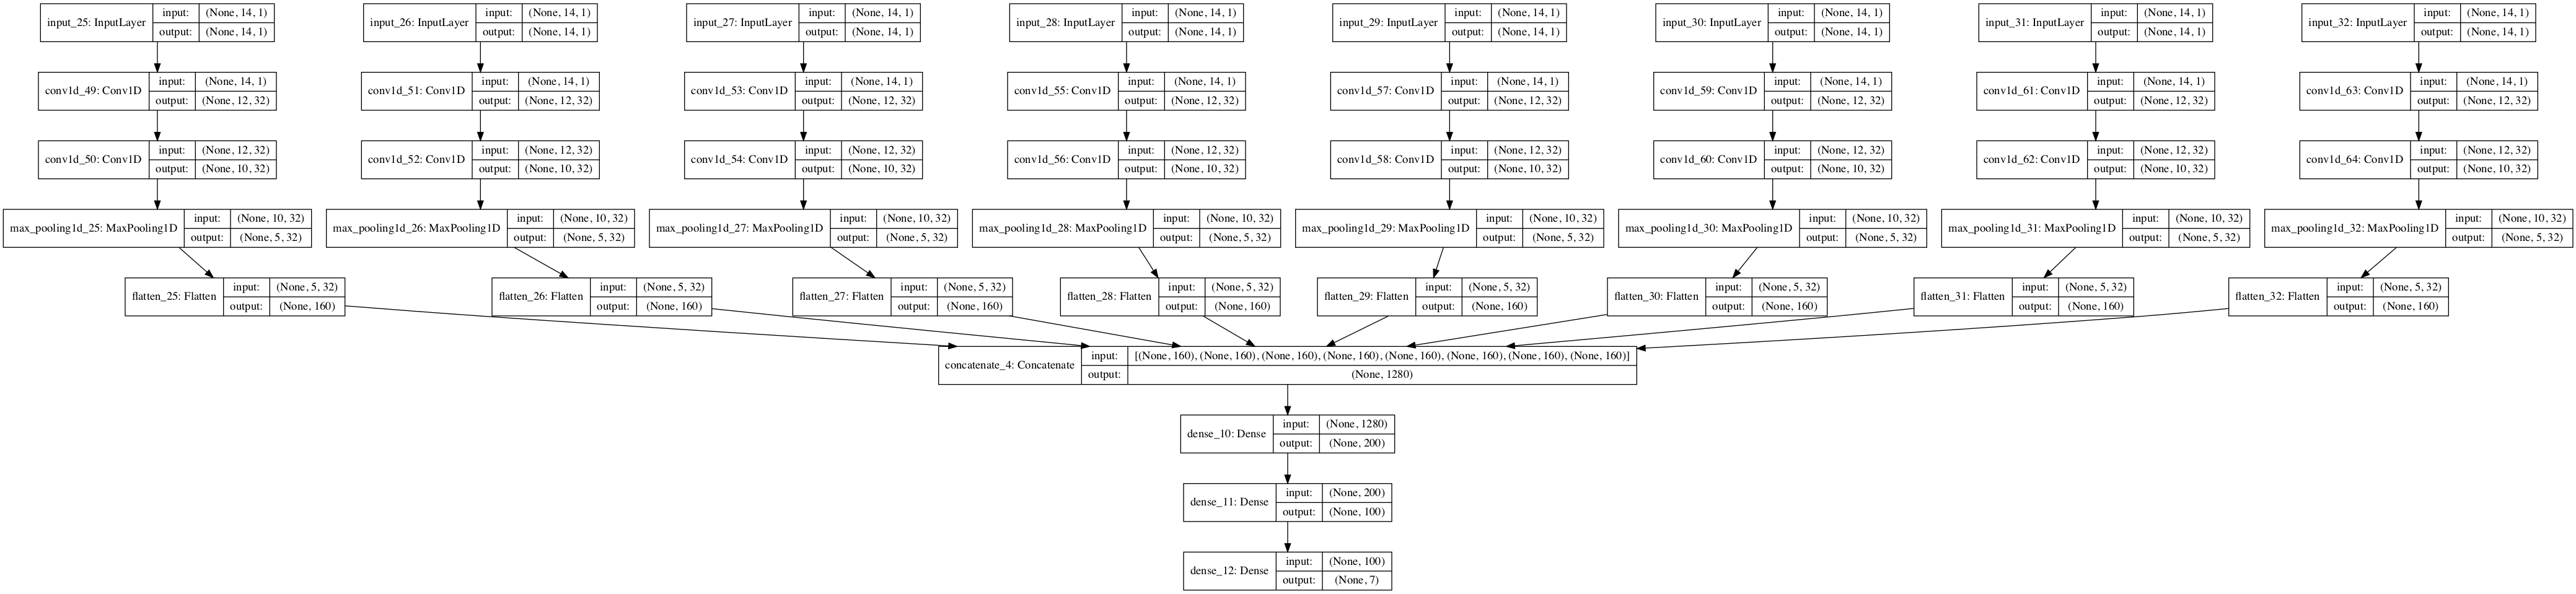

In [5]:
from IPython.display import Image
Image(retina=True, filename='multiheaded_cnn.png')

Running the example fits and evaluates the model, printing the overall RMSE across all seven days, and the per-day RMSE for each lead time. We can see that in this case, the overall RMSE is skillful compared to a naive forecast, but with the chosen configuration may not perform better than the multi-channel model in the previous section.

We can also see a different, more pronounced profile for the daily RMSE scores where perhaps Mon-Tue and Thu-Fri are easier for the model to predict than the other forecast days. These results may be useful when combined with another forecast model. It may be interesting to explore alternate methods in the architecture for merging the output of each submodel.

## 19.10 Further Reading
This section provides more resources on the topic if you are looking to go deeper.
- Getting started with the Keras Sequential model.
https://keras.io/getting-started/sequential-model-guide/
- Getting started with the Keras functional API. https://keras.io/getting-started/functional-api-guide/
- Keras Sequential Model API. https://keras.io/models/sequential/
- Keras Core Layers API. https://keras.io/layers/core/
- Keras Convolutional Layers API. https://keras.io/layers/convolutional/
- Keras Pooling Layers API. https://keras.io/layers/pooling/

## 19.11 Summary
In this tutorial, you discovered how to develop 1D convolutional neural networks for multi-step time series forecasting. Specifically, you learned:
- How to develop a CNN for multi-step time series forecasting model for univariate data.
- How to develop a multi-channel multi-step time series forecasting model for multivariate
data.
- How to develop a multi-headed multi-step time series forecasting model for multivariate data.
